# Recommendation Systems

In [78]:
#Recommender systems aim to predict users’ interests and recommend product items that quite likely are interesting for them.

#Recommendation system will help businesses improve their shopper's,user experience or on website,youtub,amazon and result in better customer acquisition and retention.

In [76]:
#Types of recommendation system

In [4]:
#There are majorly six types of recommender systems which work primarily in the Media and Entertainment industry::

#1. Popularity based recommendation system
#2. Content-based recommendation system
#3. Collaborative recommendation system
#4. Matrix factorization recommendation system
#5. Association Rule
#6. Hybrid-recommendation system

In [5]:
#Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#1. Popularity based recommendation system

In [8]:
#This model is not actually personalized - it simply recommends to a user the most popular items that the user has not previously consumed 
#i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [9]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\book.csv')
df.head()

,Unnamed: 0,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


In [10]:
df.shape

(26500, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26500 entries, 0 to 26499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        26500 non-null  int64 
 1   userID            26500 non-null  int64 
 2   ISBN              26500 non-null  object
 3   bookRating        26500 non-null  int64 
 4   bookTitle         26500 non-null  object
 5   totalRatingCount  26500 non-null  int64 
 6   Location          26500 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


In [12]:
df1=df.drop('Unnamed: 0',axis=1)
df1.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


In [13]:
df1.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


In [14]:
df1.tail()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
26495,207782,452282152,8,Girl with a Pearl Earring,526,"midland, texas, usa"
26496,208568,452282152,0,Girl with a Pearl Earring,526,"fontana, california, usa"
26497,208605,452282152,0,Girl with a Pearl Earring,526,"cape neddick, maine, usa"
26498,208829,452282152,0,Girl with a Pearl Earring,526,"fredericton, new brunswick, canada"
26499,210822,452282152,0,Girl with a Pearl Earring,526,"new orleans, louisiana, usa"


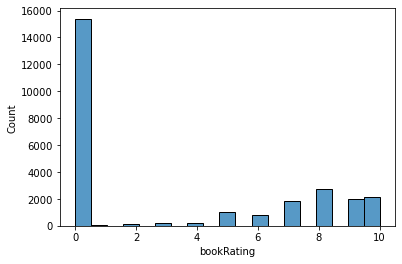

In [15]:
sns.histplot(df1['bookRating'])
plt.show()

In [16]:
# Top 5 books in terms of average rating 
data1=df1.groupby('bookTitle')['bookRating'].agg('mean').sort_values(ascending=False)
data1.head()

bookTitle
Das Parfum: Die Geschichte Eines Morders            10.000000
Matilda                                              8.000000
Harry Potter and the Chamber of Secrets (Book 2)     6.720588
MÃ?Â¶rder ohne Gesicht.                              6.500000
Ender's Game (Ender Wiggins Saga (Paperback))        5.857143
Name: bookRating, dtype: float64

In [17]:
# some books may get high average rating , but it is not reviewed by many users
# Hence we need to consider the review count also for better recommendation
data2=df1.groupby('bookTitle').agg({'bookRating':'mean','totalRatingCount':"count"})
data2.head()

,bookRating,totalRatingCount
bookTitle,,
1st to Die: A Novel,3.415301,366
"A Child Called \It\"": One Child's Courage to Survive""",4.139738,229
A Cold Heart: An Alex Delaware Novel,3.112903,62
A Kiss of Shadows (Meredith Gentry Novels (Paperback)),4.013333,75
A Man in Full,2.111111,90


In [18]:
#consider the books for recommendation only if it has 100 rating counts
top_popularity_table=data2[data2['totalRatingCount']>100]
top_popularity_table.head()

,bookRating,totalRatingCount
bookTitle,,
1st to Die: A Novel,3.415301,366
"A Child Called \It\"": One Child's Courage to Survive""",4.139738,229
A Painted House,3.260870,736
A Wrinkle In Time,4.569444,144
All Around the Town,2.946970,132


In [19]:
#2. Content-based recommendation system

In [20]:
#This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. 
#In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present).
#In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended..

In [21]:
df2=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\movie_metadata.csv')
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
df2.shape

(5043, 28)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [24]:
df2['genres'].value_counts()

Drama                                         236
Comedy                                        209
Comedy|Drama                                  191
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Comedy|Crime|Drama|Horror|Mystery|Thriller      1
Adventure|Drama|Horror|Mystery|Thriller         1
Biography|Comedy|Drama|Family|Sport             1
Action|Crime|Horror|Thriller                    1
Action|Crime|Fantasy|Romance|Thriller           1
Name: genres, Length: 914, dtype: int64

In [25]:
genres=df2['genres'].str.split('|',expand=True)
genres

,0,1,2,3,4,5,6,7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Documentary,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
5038,Comedy,Drama,None,None,None,None,None,None
5039,Crime,Drama,Mystery,Thriller,None,None,None,None
5040,Drama,Horror,Thriller,None,None,None,None,None
5041,Comedy,Drama,Romance,None,None,None,None,None


In [26]:
genres=genres.iloc[:,0:3]
genres

,0,1,2
0,Action,Adventure,Fantasy
1,Action,Adventure,Fantasy
2,Action,Adventure,Thriller
3,Action,Thriller,None
4,Documentary,None,None
...,...,...,...
5038,Comedy,Drama,None
5039,Crime,Drama,Mystery
5040,Drama,Horror,Thriller
5041,Comedy,Drama,Romance


In [27]:
genres=genres.fillna('Other')
genres

,0,1,2
0,Action,Adventure,Fantasy
1,Action,Adventure,Fantasy
2,Action,Adventure,Thriller
3,Action,Thriller,Other
4,Documentary,Other,Other
...,...,...,...
5038,Comedy,Drama,Other
5039,Crime,Drama,Mystery
5040,Drama,Horror,Thriller
5041,Comedy,Drama,Romance


In [28]:
genres.columns = ['genres0','genres1','genres2']
genres

,genres0,genres1,genres2
0,Action,Adventure,Fantasy
1,Action,Adventure,Fantasy
2,Action,Adventure,Thriller
3,Action,Thriller,Other
4,Documentary,Other,Other
...,...,...,...
5038,Comedy,Drama,Other
5039,Crime,Drama,Mystery
5040,Drama,Horror,Thriller
5041,Comedy,Drama,Romance


In [29]:
data3=pd.concat([df2,genres],axis=1)
data3.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres0,genres1,genres2
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action,Adventure,Fantasy
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action,Adventure,Fantasy
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action,Adventure,Thriller
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action,Thriller,Other
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,Documentary,Other,Other


In [30]:
data3.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genres0',
       'genres1', 'genres2'],
      dtype='object')

In [31]:
features=['movie_title','content_rating','imdb_score','genres0',
       'genres1', 'genres2']#considering only important features

In [32]:
data4=data3[features]
data4=data4.drop_duplicates()
data4=data4.set_index('movie_title')

In [33]:
data4.head()

,content_rating,imdb_score,genres0,genres1,genres2
movie_title,,,,,
Avatar,PG-13,7.9,Action,Adventure,Fantasy
Pirates of the Caribbean: At World's End,PG-13,7.1,Action,Adventure,Fantasy
Spectre,PG-13,6.8,Action,Adventure,Thriller
The Dark Knight Rises,PG-13,8.5,Action,Thriller,Other
Star Wars: Episode VII - The Force Awakens,NaN,7.1,Documentary,Other,Other


In [34]:
data4=pd.get_dummies(data4)
data4.head(10)

,imdb_score,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,...,genres2_News,genres2_Other,genres2_Reality-TV,genres2_Romance,genres2_Sci-Fi,genres2_Short,genres2_Sport,genres2_Thriller,genres2_War,genres2_Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,7.9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,7.1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Spectre,6.8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,8.5,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
Star Wars: Episode VII - The Force Awakens,7.1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
John Carter,6.6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Spider-Man 3,6.2,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Tangled,7.8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Avengers: Age of Ultron,7.5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
from sklearn.neighbors import NearestNeighbors

In [36]:
rec_model = NearestNeighbors(metric = 'cosine')
rec_model.fit(data4)

NearestNeighbors(metric='cosine')

In [37]:
#movies related to The Dark Knight Rises

In [38]:
data4.iloc[3,:]#The Dark Knight Rises record

imdb_score                 8.5
content_rating_Approved    0.0
content_rating_G           0.0
content_rating_GP          0.0
content_rating_M           0.0
                          ... 
genres2_Short              0.0
genres2_Sport              0.0
genres2_Thriller           0.0
genres2_War                0.0
genres2_Western            0.0
Name: The Dark Knight Rises , Length: 89, dtype: float64

In [39]:
dis,ind=rec_model.kneighbors(X=data4.iloc[3,:].values.reshape(1,-1),n_neighbors=15)

In [40]:
dis

array([[0.        , 0.0001422 , 0.00094531, 0.00150996, 0.00410679,
        0.00509302, 0.01221073, 0.01342802, 0.01360121, 0.01442017,
        0.01491631, 0.01491631, 0.01578956, 0.0161194 , 0.01647063]])

In [41]:
ind

array([[   3, 1854,  222,  350, 1044,  971, 2291,  120, 1738,  394, 1282,
        1387, 4758, 1116,  584]], dtype=int64)

In [42]:
data4.index[ind[0]]#All action movies

Index(['The Dark Knight Rises ', 'Taken ', 'Jason Bourne ', 'Unstoppable ',
       'Taken 3 ', 'Into the Storm ', 'The Cold Light of Day ',
       'Batman Begins ', 'Die Hard ', 'Ocean's Eleven ', 'The Impossible ',
       'Batman ', 'Shotgun Stories ', 'The Ghost Writer ', 'Die Hard 2 '],
      dtype='object', name='movie_title')

In [43]:
#movies related to Tangled

In [44]:
data4.head(10)

,imdb_score,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,...,genres2_News,genres2_Other,genres2_Reality-TV,genres2_Romance,genres2_Sci-Fi,genres2_Short,genres2_Sport,genres2_Thriller,genres2_War,genres2_Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,7.9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,7.1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Spectre,6.8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,8.5,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
Star Wars: Episode VII - The Force Awakens,7.1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
John Carter,6.6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Spider-Man 3,6.2,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Tangled,7.8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Avengers: Age of Ultron,7.5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
data4.iloc[7,:]#The Dark Knight Rises record

imdb_score                 7.8
content_rating_Approved    0.0
content_rating_G           0.0
content_rating_GP          0.0
content_rating_M           0.0
                          ... 
genres2_Short              0.0
genres2_Sport              0.0
genres2_Thriller           0.0
genres2_War                0.0
genres2_Western            0.0
Name: Tangled , Length: 89, dtype: float64

In [46]:
dc1,ind1=rec_model.kneighbors(X=data4.iloc[7,:].values.reshape(1,-1), n_neighbors=15)

In [47]:
dc1

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.64466631e-06,
        1.99776330e-05, 1.99776330e-05, 1.05799112e-04, 1.05799112e-04,
        1.34610026e-04, 1.34610026e-04, 1.98878240e-04, 1.98878240e-04,
        1.98878240e-04, 1.98878240e-04, 2.77820748e-04]])

In [48]:
ind1

array([[   7,   90, 1284,  918,  644,  125,   67,   78,  238,  962,   56,
         437,  576,  180,  413]], dtype=int64)

In [49]:
data4.index[ind1[0]]#All animated movies

Index(['Tangled ', 'Wreck-It Ralph ', 'Fantastic Mr. Fox ', 'Shrek ',
       'Ice Age ', 'Frozen ', 'Up ', 'Inside Out ', 'The Croods ',
       'The Book of Life ', 'Brave ', 'Lilo & Stitch ', 'Shrek 2 ', 'Rango ',
       'Arthur Christmas '],
      dtype='object', name='movie_title')

In [50]:
#3. Collaborative recommendation system

In [51]:
#Collaborative filtering is currently one of the most frequently used approaches and usually provides better results than content-based recommendations. 
#Some examples of this are found in the recommendation systems of Youtube, Netflix, and Spotify.

#Collaborative Filtering, which is also known as User-User Filtering. 
#As hinted by its alternate name, this technique uses other users to recommend items to the input user. 
#It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. 
#There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the Pearson Correlation Function.

In [52]:
df3=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\ratings.csv')
df3.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [53]:
df3.shape

(100004, 4)

In [54]:
df3=df3.sample(n=500)

In [55]:
df3['rating'].value_counts()

4.0    145
3.0     89
5.0     79
3.5     55
4.5     47
2.0     43
2.5     21
1.0     12
1.5      6
0.5      3
Name: rating, dtype: int64

In [56]:
#import surprise
from surprise import SVDpp
from surprise.model_selection import train_test_split
from surprise import Dataset,Reader

In [57]:
reader=Reader(rating_scale=(1,5))#The Reader class is used to parse a file containing ratings.
#reader

In [58]:
rating_data=Dataset.load_from_df(df3[['userId','movieId','rating']], reader)
#rating_data
[trainset, testset] = train_test_split(rating_data, test_size=.15,shuffle=True)

In [59]:
trainsetfull=rating_data.build_full_trainset()
print('Number of users:',trainsetfull.n_users)
print('Number of items:',trainsetfull.n_items)

Number of users: 252
Number of items: 438


In [60]:
algo=SVDpp()
algo.fit(trainsetfull)

In [61]:
algo.predict(uid = 50, iid =2)

Prediction(uid=50, iid=2, r_ui=None, est=3.4787755872243844, details={'was_impossible': False})

In [62]:
item_id=df3['movieId'].unique()
len(item_id)

438

In [63]:
item_id10=df3.loc[df3['userId']==15,'movieId']
len(item_id10)

11

In [64]:
item_id_pred=np.setdiff1d(item_id,item_id10)
len(item_id_pred)

427

In [65]:
testset=[[50,iid,5] for iid in item_id_pred]
pred=algo.test(testset)
pred

[Prediction(uid=50, iid=1, r_ui=5, est=3.619192754742829, details={'was_impossible': False}),
 Prediction(uid=50, iid=2, r_ui=5, est=3.4787755872243844, details={'was_impossible': False}),
 Prediction(uid=50, iid=3, r_ui=5, est=3.337909917915934, details={'was_impossible': False}),
 Prediction(uid=50, iid=5, r_ui=5, est=3.399203447930465, details={'was_impossible': False}),
 Prediction(uid=50, iid=10, r_ui=5, est=3.513994283090509, details={'was_impossible': False}),
 Prediction(uid=50, iid=11, r_ui=5, est=3.3700616377101196, details={'was_impossible': False}),
 Prediction(uid=50, iid=21, r_ui=5, est=3.919858639605601, details={'was_impossible': False}),
 Prediction(uid=50, iid=30, r_ui=5, est=3.6011519900549858, details={'was_impossible': False}),
 Prediction(uid=50, iid=32, r_ui=5, est=3.5502532099475506, details={'was_impossible': False}),
 Prediction(uid=50, iid=34, r_ui=5, est=3.5285093159790106, details={'was_impossible': False}),
 Prediction(uid=50, iid=36, r_ui=5, est=3.7250203

In [66]:
pred_ratings=np.array([pred1.est for pred1 in pred])
i_max=pred_ratings.argmax()
iid=item_id_pred[i_max]
print("Top item for user 10 has iid {0} with predicted rating {1}".format(iid,pred_ratings[i_max]))

Top item for user 10 has iid 21 with predicted rating 3.919858639605601


In [67]:
## Evaluating the model

In [68]:
[trainset,testset]=train_test_split(rating_data,test_size=0.2,random_state=4)

In [69]:
algo=SVDpp()
algo.fit(trainset)

In [70]:
test_pred=algo.test(testset)

In [71]:
tp=pd.DataFrame(test_pred)
tp.head()

,uid,iid,r_ui,est,details
0,119,1580,4.0,3.636083,{'was_impossible': False}
1,452,6539,4.0,3.607100,{'was_impossible': False}
2,474,898,5.0,3.747309,{'was_impossible': False}
3,547,1234,4.5,3.624423,{'was_impossible': False}
4,491,2541,1.0,3.589457,{'was_impossible': False}


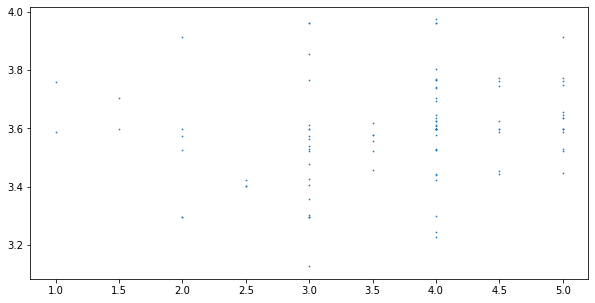

In [72]:
plt.figure(figsize=(10,5))
plt.scatter(tp['r_ui'],tp['est'],s=0.5)
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(tp['r_ui'],tp['est']))
print('RMSE on test:',rmse)

RMSE on test: 0.9404751076158013


In [ ]:
#---------------------------------------------------------END-------------------------------------------#